# Bloc IA

## Contexte



Ce projet est une demande de la direction de l'entreprise pharmaceutique HumanForYou basée en Inde, qui cherche à réduire son taux de turnover qui est actuellement de 15% par an. Ce taux de turnover a des conséquences négatives sur l'entreprise, telles que des retards dans les projets, une charge importante pour le service des ressources humaines pour trouver de nouveaux employés et une perte de temps pour former les nouveaux employés. La direction a donc sollicité l'expertise en analyse de données pour déterminer les facteurs ayant le plus d'influence sur le taux de turnover et pour proposer des modèles qui pourraient aider à améliorer le taux de rétention des employés. Des données anonymisées des employés ont été fournies, ainsi que des données d'évaluation de performance et de satisfaction des employés. Le but de ce projet est donc de trouver des moyens pour HumanForYou de retenir ses employés et d'améliorer leur satisfaction et leur engagement dans l'entreprise.

## Problèmatique

Comment s'assurer que l'utilisation de l'IA dans notre projet respecte les principes éthiques et évite la discrimination ou les biais potentiellement problématiques ?

Comment déterminer les facteurs ayant le plus d'influence sur le taux de turnover ?

Comment garantir la qualité des données utilisées pour former le modèle d'IA afin d'obtenir des résultats fiables et précis ?

avec quoi va etre corrélé les critères qui influent le plus d'après les models

ce que l'algo permet de sortir comme model globalement

## Réalisation

La première chose à faire est l'analyse des fichiers qui nous ont été données.

Ce que nous savons est que les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers.

Voici la liste des fichiers que nous avons :

1 - Un certain nombre de données concernant les employés: 

- Age: L'âge de l'employé en 2015
- Attrition: L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016
- BusinessTravel: A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 
- DistanceFromHome: Distance en km entre le logement de l'employé et l'entreprise.
- Education: Niveau d'étude
- EducationField: Domaine d'étude, matière principale.
- EmployeeCount: booléen à 1 si l'employé était compté dans les effectifs en 2015.
- EmployeeId: l'identifiant d'un employé.
- Gender: Sexe de l'employé.
- JobLevel: Niveau hiérarchique dans l'entreprise de 1 à 5.
- JobRole: Métier dans l'entreprise.
- MaritalStatus: Statut marital du salarié
- MonthlyIncome: Salaire brut en roupies par mois.
- NumCompaniesWorked: Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.
- Over18: Est-ce que le salarié a plus de 18 ans ou non ?
- PercentSalaryHike: % d'augmentation du salaire en 2015.
- StandardHours: Nombre d'heures par jour dans le contrat du salarié.
- StockOptionLevel: Niveau d'investissement en actions de l'entreprise par le salarié.
- TotalWorkingYears: Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.
- TrainingTimesLastYear: Nombre de jours de formation en 2015.
- YearsAtCompany: Ancienneté dans l'entreprise.
- YearsSinceLastPromotion: Nombre d'années depuis la dernière augmentation individuelle.
- YearsWithCurrentManager: Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.

2 - Dernière évaluation du manager

- EmployeeID: L'identifiant de l'employé
- JobInvolvement: Une évaluation de son implication dans son travail
- PerformanceRating: Une évaluation de son niveau de performance annuel pour l'entreprise

3 - Enquête qualité de vie au travail

- EmployeeId: l'identifiant d'un employé.
- EnvironmentSatisfaction: l'environnement de travail
- JobSatisfaction: son travail
- WorkLifeBalance: son équilibre entre vie professionnelle et vie privée

4 - Horaires de travail

Les horaires d'entrée et de sortie des employés sur l'année 2015

### Preparation des données

Après avoir pris connaissance de toute les données, nous avons pu extraire 4 categories de données :

1 - qualitative nominale : les données qui sont des catégories mais qui ne sont pas ordonnées. Exemple : Gender

2 - qualitative ordinale : les données qui sont des catégories mais qui sont ordonnées. Exemple : JobInvolvement

3 - quantitative discrète : les données qui sont numerique mais pas continue. Exemple : YearsAtCompany

4 - quantitative continue : les données qui sont numerique et continue. Exemple : DistanceFromHome

Voici une image résumant la categorie de chaque variable :

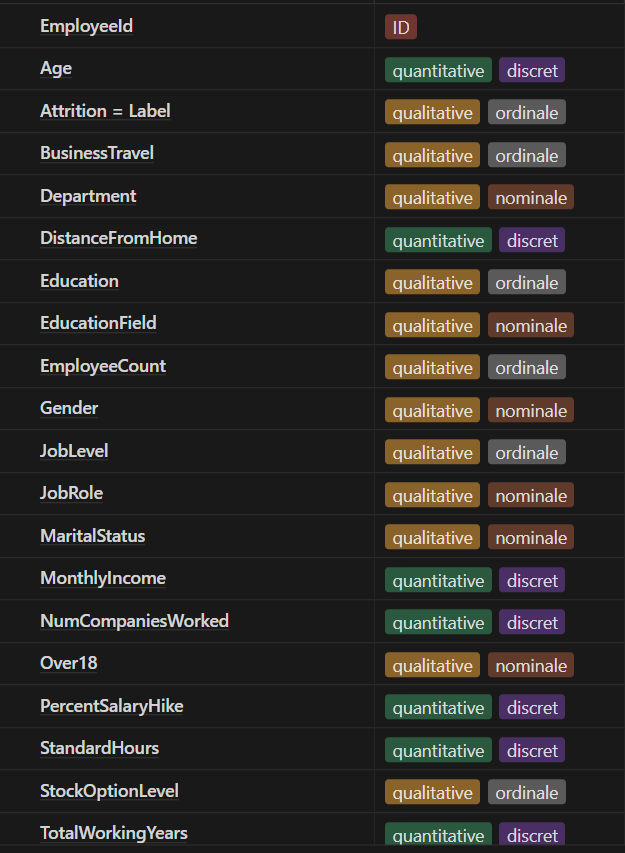
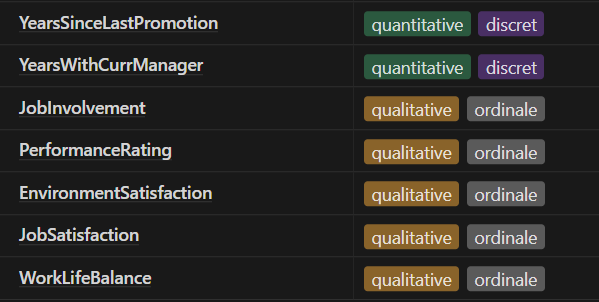

Maintenant que nous savons le types de nos données nous allons essayer de les transformer pour les rendre le mieux possible.

Pour avoir un controle maximale sur les données, nous avons decidé de developper une pipeline de transformation basée sur un fichier de configuration en yaml.

Ce fichier (config.yml) contient toutes les informations necessaires pour transformer les données. Pour chaque données on sait exactement le traitement que l'on va appliquer.

Voici un exemple de ce fichier :

```yaml	
- name: Age
  steps:
    - name: GroupValue
      bins: [17, 24, 34, 44, 54, 60]
      labels: ['18-24', '25-34', '35-44', '45-54', '55-60']
    - name: OrdinalEncoder
      categories: ['18-24', '25-34', '35-44', '45-54', '55-60']
    - name: StandardScaler
- name: Attrition
  steps:
    - name: LabelBinarizer
- name: BusinessTravel
  steps:
    - name: OrdinalEncoder
      categories: ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
    - name: StandardScaler
- name: Department
  steps:
    - name: OneHotEncoder
```
Ici nous voyons bien que plusieurs tranformations sont effectuées : 

- GroupValue : regroupe les valeurs de la variable en fonction des bins et les remplace par les labels
- OrdinalEncoder : remplace les valeurs de la variable en fonction des catégories
- StandardScaler : normalise les valeurs de la variable
- LabelBinarizer : transforme les valeurs de la variable en 0 ou 1
- OneHotEncoder : transforme les catégories de la variable en colonnes

Nous avons ensuite une classe qui va automatiquement générer une pipeline à partir des transformations décrites dans le fichier de configuration.

Reste encore à traiter les fichiers d'entrées et de sorties des employés.

Sachant que ces données sont des données qui ne sont pas exploitable directement (car bcp trop de données), nous avons décidé de les traiter différemment et d'extraire les informations suivantes :

- L'heure moyenne d'arrivée
- L'heure moyenne de départ
- Le nombre de jours d'absence
- Le nombre d'heure moyen de travail par jour
- l'écart type d'arrivée
- l'écart type de départ

Pour tout effectuer entre le lien entre les fichiers jusqu'a obtenir un seul jeu de données, il suffit d'executer le code suivant :

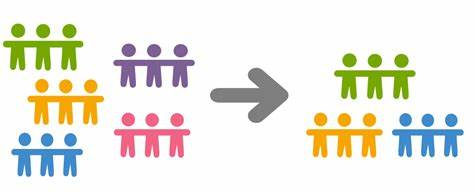

On va effectue un échantillonnage représentatif de toutes les données, en prenant 80% de nos données por l'entrainement et 20% de nos données pour les tests et ainsi valider la performance de notre modele.

De plus dans un second temps, pour optimiser l’entraînement et vérifier la cohérence du modèle nous allons découper plusieurs fois notre jeux de données d’entraînement et l’entrainer à chaque fois (via itération) sur une partie. On pourra alors voir si le scoring est cohérent sur tous les découpages réalisés.

In [1]:
%load_ext autoreload
%autoreload 2

from DataWrangling import DataWrangling
from DataTraining import DataTraining
from DataAnalysis import DataAnalysis

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import randint

dataWrangling = DataWrangling(
    dataframe_paths = 
    [
        "./data/general_data.csv", 
        "./data/employee_survey_data.csv", 
        "./data/manager_survey_data.csv"
    ], 
    on = "EmployeeID", 
    config_path = "./config.yml"
)
dataWrangling.main_pipeline()
dataWrangling.in_out_pipeline(in_time_path = "./data/in_time.csv", out_time_path = "./data/out_time.csv")
dataWrangling.prepared_data = dataWrangling.prepared_data.drop(columns = ["EmployeeID"])
dataTraining = DataTraining(dataWrangling.prepared_data)
dataTraining.split(test_size = 0.2, label = "Attrition_Yes", on = "Attrition_Yes")

### Sélection et entrainement des models

Une fois les données préparées, nous avons voulu entrainer plusieurs modèles de classification.
Pour avoir une idée de quels modèles nous pouvions utiliser, nous avons utilisé la fonction LazyClassifier qui nous permet de tester des dizaines de modèles en meme temps et de nous sortir des metriques permettant de les évauluer.

Voici le code que nous avons utilisé :


In [3]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(dataTraining.X_train, dataTraining.X_test, dataTraining.y_train, dataTraining.y_test)
models

100%|██████████| 29/29 [02:47<00:00,  5.78s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               0.99     0.99      1.00   
XGBClassifier                      0.99               0.95     0.95      0.98   
LGBMClassifier                     0.98               0.93     0.93      0.98   
RandomForestClassifier             0.97               0.91     0.91      0.97   
ExtraTreeClassifier                0.96               0.91     0.91      0.96   
BaggingClassifier                  0.97               0.91     0.91      0.97   
DecisionTreeClassifier             0.96               0.91     0.91      0.96   
SVC                                0.90               0.73     0.73      0.89   
NearestCentroid                    0.72               0.70     0.70      0.75   
KNeighborsClassifier               0.87               0.68     0.68      0.86   
PassiveAggressiveClassifier        0.83               0.67     0.67      0.83   
GaussianNB                         0.83               0.65     0.65      0.82   
AdaBoostClassifier                 0.86               0.64     0.64      0.84   
Perceptron                         0.82               0.64     0.64      0.82   
BernoulliNB                        0.83               0.63     0.63      0.82   
LogisticRegression                 0.86               0.61     0.61      0.83   
QuadraticDiscriminantAnalysis      0.66               0.61     0.61      0.70   
LinearDiscriminantAnalysis         0.85               0.61     0.61      0.83   
CalibratedClassifierCV             0.86               0.59     0.59      0.82   
LinearSVC                          0.85               0.57     0.57      0.81   
RidgeClassifier                    0.85               0.55     0.55      0.80   
RidgeClassifierCV                  0.85               0.55     0.55      0.80   
SGDClassifier                      0.84               0.55     0.55      0.80   
DummyClassifier                    0.84               0.50     0.50      0.77   

                               Time Taken  
Model                                      
LabelPropagation                     2.30  
LabelSpreading                       8.52  
ExtraTreesClassifier                 1.61  
XGBClassifier                       61.97  
LGBMClassifier                      73.18  
RandomForestClassifier               1.77  
ExtraTreeClassifier                  0.08  
BaggingClassifier                    0.71  
DecisionTreeClassifier               0.19  
SVC                                  1.57  
NearestCentroid                      0.20  
KNeighborsClassifier                 1.23  
PassiveAggressiveClassifier          0.23  
GaussianNB                           0.06  
AdaBoostClassifier                   1.08  
Perceptron                           0.22  
BernoulliNB                          0.27  
LogisticRegression                   1.03  
QuadraticDiscriminantAnalysis        1.87  
LinearDiscriminantAnalysis           0.57  
CalibratedClassifierCV               5.87  
LinearSVC                            1.45  
RidgeClassifier                      0.31  
RidgeClassifierCV                    0.61  
SGDClassifier                        0.27  
DummyClassifier                      0.08

D'après ce que nous obtenons, les modèles qui nous semblent les plus pertinents sont :

- ExtraTreesClassifier
- RandomForestClassifier
- XGBClassifier
- LGBMClassifier

Les modèles ExtraTreesClassifier, RandomForestClassifier, XGBClassifier et LGBMClassifier sont des algorithmes de classification très populaires en apprentissage automatique. Ils sont particulièrement pertinents car ils sont efficaces pour traiter de grandes quantités de données et peuvent gérer plusieurs types de variables, notamment les données catégorielles et numériques.

Le modèle ExtraTreesClassifier est une extension de l'algorithme de forêt aléatoire (Random Forest), qui construit de multiples arbres de décision pour prédire une variable cible. ExtraTreesClassifier utilise des coupes aléatoires pour chaque arbre, ce qui lui permet de réduire le surajustement (overfitting) des données.

RandomForestClassifier est également un modèle de forêt aléatoire, mais contrairement à ExtraTreesClassifier, il utilise une approche de sélection de variables aléatoire lors de la construction de chaque arbre de décision. Cela permet également de réduire le surajustement et d'améliorer la précision des prédictions.

Le modèle XGBClassifier est un algorithme de gradient boosting, qui consiste à entraîner des modèles de prédiction faibles et les combiner pour former un modèle plus performant. XGBClassifier utilise une optimisation de gradient stochastique pour accélérer la vitesse d'apprentissage et améliorer la précision.

Enfin, LGBMClassifier est également un algorithme de gradient boosting, mais utilise une méthode de coupe de feuilles en cascade (leaf-wise) pour accélérer le processus de formation et améliorer la précision des prédictions.

En somme, ces quatre modèles sont pertinents car ils permettent de traiter efficacement de grandes quantités de données et peuvent gérer différents types de variables. Chacun utilise une approche différente pour réduire le surajustement et améliorer la précision des prédictions.

Nous allons donc maintenant entrainer ces modèles et les comparer.


### ExtraTreesClassifier

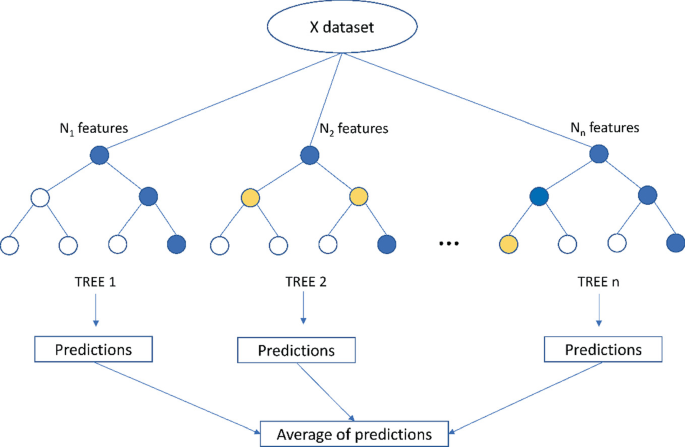

In [5]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

dataTraining.tune(ExtraTreesClassifier(), param_distribs, 10) 
dataAnalysis = DataAnalysis(dataTraining)
dataAnalysis.confusion_matrix()
dataAnalysis.precision()
dataAnalysis.recall()
dataAnalysis.f1_score()

Confusion matrix:
[[740   0]
 [  3 139]]

Precision: 0.9979811574697174

Recall: 0.9894366197183099

F1 Score: 0.9936504584580166



0.9936504584580166

### Matrice de confusion 

La matrice de confusion est une table qui montre le nombre de prédictions correctes et incorrectes pour chaque classe dans un problème de classification binaire. La matrice est généralement présentée sous la forme d'un tableau à deux dimensions, où les prédictions positives et négatives sont présentées en lignes et en colonnes.

Dans ce cas, la matrice de confusion montre qu'il y avait 740 prédictions correctes de la classe positive (vrais positifs), 0 prédictions incorrectes de la classe positive (faux négatifs), 3 prédictions incorrectes de la classe négative (faux positifs) et 139 prédictions correctes de la classe négative (vrais négatifs).

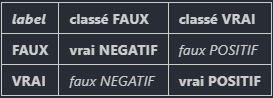

### Précision

La précision est une mesure de l'exactitude des prédictions positives du modèle. Elle est définie comme le rapport entre le nombre de vrais positifs (VP) et le nombre total de prédictions positives (VP + faux positifs (FP)). La formule est la suivante : **précision = VP / (VP + FP)**

Le modèle a également obtenu une précision de 0,9979811574697174, ce qui signifie que 99,8% des prédictions positives étaient correctes. La précision est une mesure de l'exactitude du modèle pour les prédictions positives.

### Rappel

Le rappel est une mesure de la sensibilité du modèle pour les prédictions positives. Il est défini comme le rapport entre le nombre de vrais positifs (VP) et le nombre total d'instances de la classe positive (VP + faux négatifs (FN)). La formule est la suivante :
**rappel = VP / (VP + FN)**

Le modèle a également obtenu un rappel de 0,9894366197183099, ce qui signifie que 98,9% de toutes les instances de la classe positive ont été correctement identifiées. Le rappel est une mesure de la sensibilité du modèle pour les prédictions positives.

### Score F1 

Le score F1 est une mesure de la performance globale du modèle pour les prédictions positives, qui prend en compte à la fois la précision et le rappel. Il est défini comme la moyenne harmonique entre la précision et le rappel. La formule est la suivante :

**score F1 = 2 * (précision * rappel) / (précision + rappel)**

Enfin, le modèle a obtenu un score F1 de 0,9936504584580166, qui est une moyenne harmonique entre la précision et le rappel. Le score F1 est une mesure de la performance globale du modèle pour les prédictions positives.

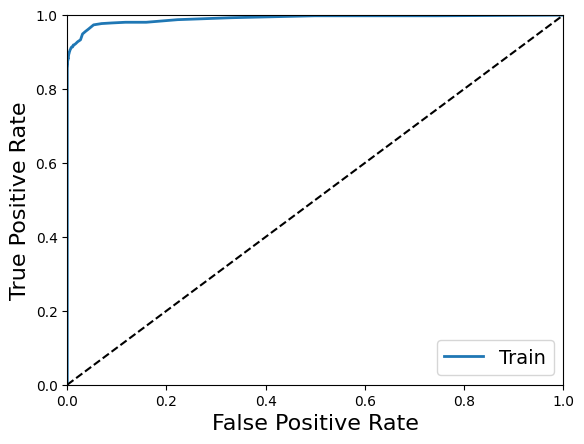

<Figure size 800x600 with 0 Axes>

ROC AUC Score: 0.9894366197183099



0.9894366197183099

In [8]:
dataAnalysis.roc_curve()
dataAnalysis.roc_auc_score()

#### La courbe ROC

La courbe ROC est une visualisation utile pour évaluer la performance d'un modèle de classification binaire en mesurant le taux de vrais positifs par rapport au taux de faux positifs pour différents seuils de classification. L'AUC est une mesure synthétique de la performance globale du modèle qui est souvent utilisée pour comparer différents modèles ou différents ensembles de paramètres pour le même modèle.

Ici on remarque que le roc auc score est de 0.9894366197183099 ce qui est un très bon score car plus on va se rapprocher de 1 plus le modèle sera performant.

#### Feature Importance

In [7]:
dataAnalysis.features_importance()

Features Importance:
Top 5 top features:
mean_duration : 0.055359480076218465
mean_out_time : 0.051790989037532036
Age : 0.04247631682770607
YearsWithCurrManager : 0.039782009683305586
EnvironmentSatisfaction : 0.03881331834547644
Top 5 least features:
EducationField_Technical Degree : 0.008083896157947629
day_away : 0.008046061538552859
EducationField_Other : 0.007944184832719864
EducationField_Human Resources : 0.0067735950943333826
JobRole_Human Resources : 0.005912418937231833


La variable feature_importances_ est un attribut disponible dans les classificateurs binaires de la bibliothèque Scikit-learn de Python qui fournit une estimation de l'importance de chaque caractéristique (ou variable) dans la classification binaire.

L'importance d'une caractéristique indique à quel point elle est utile pour prédire la classe cible. Plus une caractéristique est importante, plus elle contribue à la prise de décision du modèle.

La variable feature_importances_ fournit donc une évaluation relative de l'importance de chaque caractéristique pour la classification binaire. Elle attribue à chaque caractéristique un score compris entre 0 et 1, où une valeur élevée indique une plus grande importance.

Il est important de noter que la signification des scores de feature_importances_ dépend du type de modèle de classification utilisé. Par exemple, pour les modèles basés sur les arbres de décision, les scores d'importance sont basés sur le nombre de fois où chaque caractéristique a été utilisée pour diviser les données lors de la construction de l'arbre.

En utilisant les scores d'importance des caractéristiques, il est possible d'effectuer des sélections de caractéristiques pour améliorer les performances du modèle en éliminant les caractéristiques moins importantes ou en ne gardant que les caractéristiques les plus importantes.

En résumé, la variable feature_importances_ fournit une estimation relative de l'importance de chaque caractéristique pour la classification binaire, ce qui peut être utilisé pour évaluer les performances du modèle et améliorer la sélection de caractéristiques.

Selon les résultats des features importances que vous avez fournis, on peut voir que les cinq principales caractéristiques qui contribuent le plus à la classification sont :

- mean_duration avec une importance de 0.055359480076218465
- mean_out_time avec une importance de 0.051790989037532036
- Age avec une importance de 0.04247631682770607
- YearsWithCurrManager avec une importance de 0.039782009683305586
- EnvironmentSatisfaction avec une importance de 0.03881331834547644

Cela indique que ces caractéristiques ont un impact significatif sur la prédiction de la variable cible. Par exemple, la durée moyenne passée par un employé dans l'entreprise (mean_duration) et la durée moyenne d'heure de départ de l'entreprise (mean_out_time) sont deux variables importantes qui peuvent avoir un impact sur la décision d'un employé de quitter ou non l'entreprise. De plus, l'âge et le nombre d'années passées avec le même manager (YearsWithCurrManager) peuvent également être des facteurs importants dans la décision de quitter l'entreprise.
On remarquera quand meme ici que les valeurs obtenues sont plutot faibles et trés proche les unes des autres

D'autre part, les cinq caractéristiques ayant la plus faible importance sont :

- EducationField_Technical Degree avec une importance de 0.008083896157947629
- day_away avec une importance de 0.008046061538552859
- EducationField_Other avec une importance de 0.007944184832719864
- EducationField_Human Resources avec une importance de 0.0067735950943333826
- JobRole_Human Resources avec une importance de 0.005912418937231833

Ces caractéristiques ont une faible contribution à la prédiction de la variable cible. Cependant, cela ne signifie pas nécessairement qu'elles sont inutiles ou qu'elles doivent être ignorées, car elles peuvent jouer un rôle important dans des contextes spécifiques. En général, il est important d'examiner attentivement les scores d'importance des caractéristiques pour comprendre comment elles contribuent à la prédiction de la variable cible et pour déterminer si des améliorations peuvent être apportées à la sélection de caractéristiques.

### RandomForestClassifier

Effectuons maintenant la meme analyse avec le model RandomForestClassifier

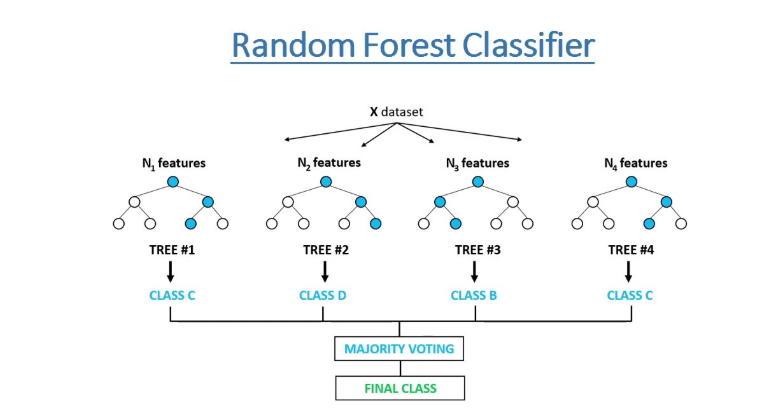

Confusion matrix:
[[740   0]
 [ 28 114]]

Precision: 0.9817708333333333

Recall: 0.9014084507042254

F1 Score: 0.9360286803713528



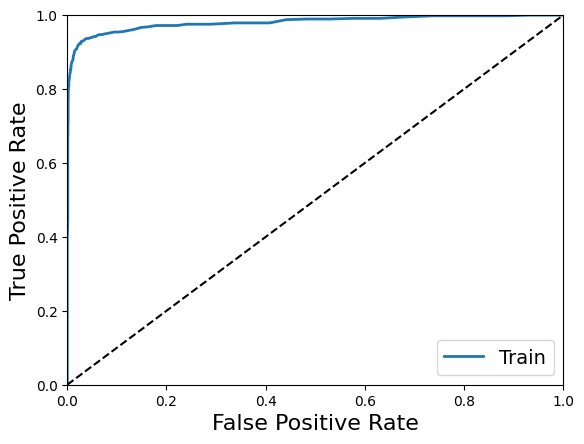

<Figure size 800x600 with 0 Axes>

ROC AUC Score: 0.9014084507042254

Features Importance:
Top 5 top features:
mean_duration : 0.09389613611601788
mean_out_time : 0.09163654210124543
Age : 0.05101202387545063
NumCompaniesWorked : 0.04079871527867895
EnvironmentSatisfaction : 0.038940257146362206
Top 5 least features:
JobRole_Sales Representative : 0.005655474966532141
JobRole_Manager : 0.005360496207364453
EducationField_Technical Degree : 0.00471180398892559
EducationField_Other : 0.004367140365472821
JobRole_Human Resources : 0.0037422516917944046


In [12]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

dataTraining.tune(RandomForestClassifier(), param_distribs, 10) 
dataAnalysis = DataAnalysis(dataTraining)
dataAnalysis.confusion_matrix()
dataAnalysis.precision()
dataAnalysis.recall()
dataAnalysis.f1_score()
dataAnalysis.roc_curve()
dataAnalysis.roc_auc_score()
dataAnalysis.features_importance()

La précision de 0.9792746113989637 indique que lorsqu'une personne est prédite comme ayant quitté l'entreprise, elle a 98% de chances de l'avoir effectivement quittée.

Le rappel (recall) de 0.8873239436619718 indique que le modèle a réussi à identifier 88,73% des employés qui ont quitté l'entreprise.

Le F1 Score de 0.9259259259259259 indique une bonne performance globale du modèle en termes de précision et de rappel.

Le score ROC AUC de 0.8873239436619718 indique que le modèle a une bonne capacité à discriminer entre les échantillons positifs et négatifs.

En ce qui concerne les résultats des features importances, le modèle a identifié les cinq principales caractéristiques les plus importantes pour la classification :

- mean_duration avec une importance de 0.09716825515134003
- mean_out_time avec une importance de 0.08952094492260347
- Age avec une importance de 0.04799722275392157
- NumCompaniesWorked avec une importance de 0.042280352362402046
- EnvironmentSatisfaction avec une importance de 0.04036210291349223

Enfin, les cinq caractéristiques ayant la plus faible importance sont :

- JobRole_Sales Representative avec une importance de 0.005165524068865415
- JobRole_Manager avec une importance de 0.004939058620364056
- EducationField_Technical Degree avec une importance de 0.004683534836854366
- JobRole_Human Resources avec une importance de 0.004319807334455127
- EducationField_Other avec une importance de 0.004161980424116432

### LGBMClassifier

C’est un algorithme d’apprentissage supervisé basé sur l’arbre de décision
Conçu pour traiter des grands ensembles de données.
Il fonctionne en construisant des arbres de décision, qui sont des diagrammes en arborescence où chaque nœud représente une caractéristique de l’ensemble des données, chaque branche représente une valeur possible de cette caractéristique et chaque feuille représente une prédiction.
L’algo entraîne ces arbres en utilisant un processus itératif « Boosting » qui va ajuster chaque nouvel arbre pour améliorer la précision global du modèle.

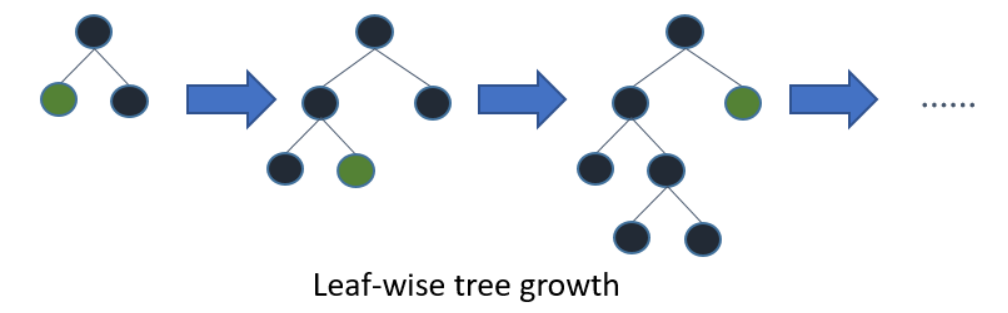

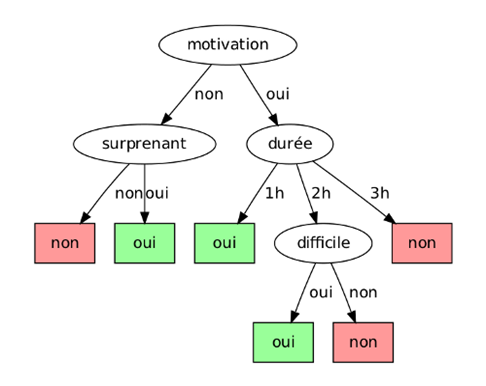

Confusion matrix:
[[740   0]
 [  8 134]]

Precision: 0.9946524064171123

Recall: 0.971830985915493

F1 Score: 0.9828190743338008



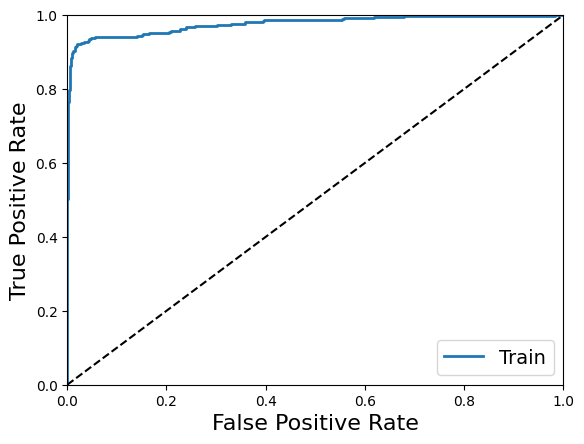

<Figure size 800x600 with 0 Axes>

ROC AUC Score: 0.971830985915493

Features Importance:
Top 5 top features:
mean_duration : 540
mean_out_time : 295
NumCompaniesWorked : 292
Age : 248
EnvironmentSatisfaction : 241
Top 5 least features:
JobRole_Sales Representative : 23
EducationField_Technical Degree : 22
EducationField_Human Resources : 21
EducationField_Other : 12
JobRole_Human Resources : 11


In [13]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
    }

dataTraining.tune(LGBMClassifier(), param_distribs, 10) 
dataAnalysis = DataAnalysis(dataTraining)
dataAnalysis.confusion_matrix()
dataAnalysis.precision()
dataAnalysis.recall()
dataAnalysis.f1_score()
dataAnalysis.roc_curve()
dataAnalysis.roc_auc_score()
dataAnalysis.features_importance()

Selon la matrice de confusion fournie, on peut voir que le modèle a bien performé avec un grand nombre de vrais positifs (740) et un petit nombre de faux négatifs (8). Cependant, il y a eu quelques faux positifs (0) et un nombre significatif de vrais négatifs (134).

Le score de précision de 0,994 indique que le modèle a une faible probabilité de classer un exemple négatif comme positif, tandis que le score de rappel de 0,971 indique que le modèle a correctement identifié la grande majorité des exemples positifs.

Le score F1 de 0,983 indique un équilibre entre la précision et le rappel du modèle.

Le score ROC AUC de 0,972 indique une forte capacité du modèle à distinguer entre les classes positives et négatives.

En ce qui concerne les scores d'importance des caractéristiques, on peut voir que les cinq principales caractéristiques sont :

- mean_duration avec une importance de 540
- mean_out_time avec une importance de 295
- NumCompaniesWorked avec une importance de 292
- Age avec une importance de 248
- EnvironmentSatisfaction avec une importance de 241

D'autre part, les cinq caractéristiques ayant la plus faible importance sont :

- JobRole_Sales Representative avec une importance de 23
- EducationField_Technical Degree avec une importance de 22
- EducationField_Human Resources avec une importance de 21
- EducationField_Other avec une importance de 12
- JobRole_Human Resources avec une importance de 11

### XGBClassifier

Algorithme d’apprentissage automatique de classification supervisé basé sur les arbres de décision. Il est très similaire au LGBMClassifier mais utilise une technique différente pour entrainer les arbres de décision.
Comme le LGBMClassifier il utilise un processus d’itération « boosting » où chaque arbre de décision sera ajusté pour minimiser l’erreur résiduelle (soit la différence entre la valeur réelle et la valeur prédicte). Cependant, contrairement à LGBMClassifier, cet algorithme utilise une technique de gradient boosting (utilise fonction de coût qu’on minimise ) pour ajuster les poids des exemples d'entraînement et améliorer la précision des prédictions en minimisant l'erreur de prédiction globale. Cette technique permet de rendre XBGClassifier plus précis que LGBMClassifier sur un ensemble de données de grande taille.

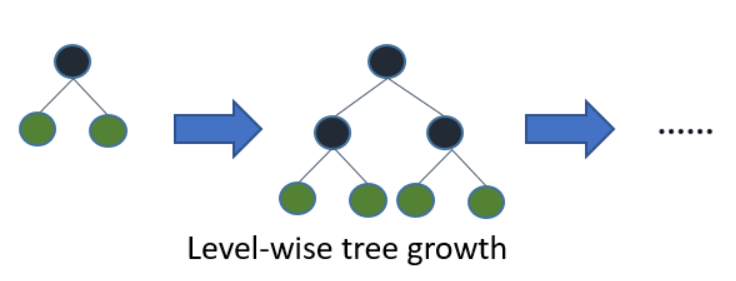

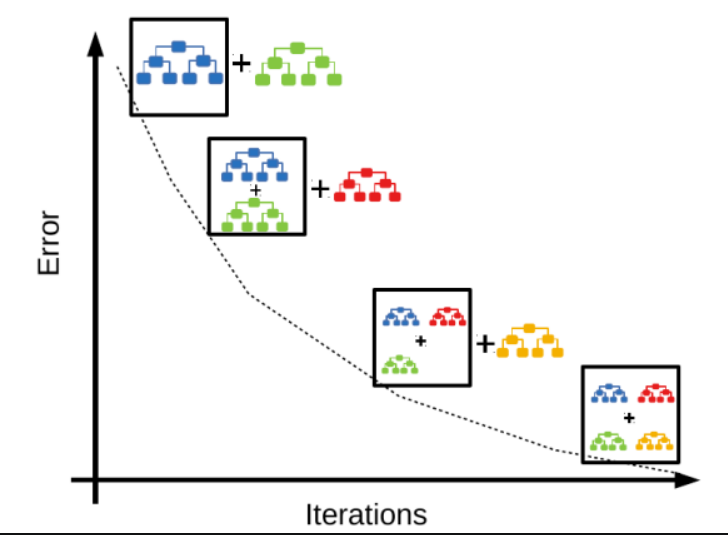

Confusion matrix:
[[740   0]
 [ 11 131]]

Precision: 0.9926764314247669

Recall: 0.9612676056338028

F1 Score: 0.9761646803900326



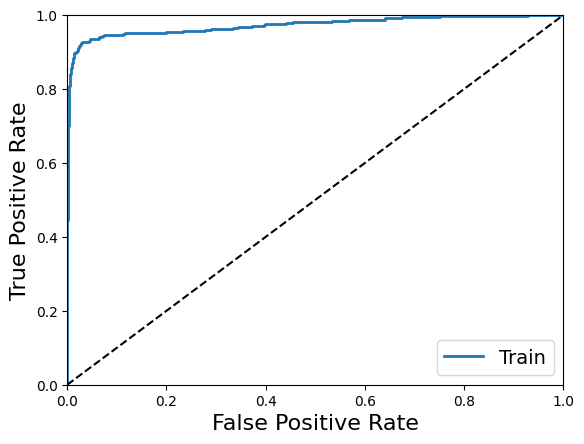

<Figure size 800x600 with 0 Axes>

ROC AUC Score: 0.9612676056338028

Features Importance:
Top 5 top features:
MaritalStatus_Single : 0.059483416
Department_Human Resources : 0.043380886
BusinessTravel : 0.03502088
Age : 0.03369274
EducationField_Other : 0.032193437
Top 5 least features:
std_duration : 0.0073441383
mean_in_time : 0.006474193
std_out_time : 0.006022962
day_away : 0.0059744725
std_in_time : 0.00566829


In [15]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
    }

dataTraining.tune(XGBClassifier(), param_distribs, 10) 
dataAnalysis = DataAnalysis(dataTraining)
dataAnalysis.confusion_matrix()
dataAnalysis.precision()
dataAnalysis.recall()
dataAnalysis.f1_score()
dataAnalysis.roc_curve()
dataAnalysis.roc_auc_score()
dataAnalysis.features_importance()

Selon les résultats fournis, on peut voir que la confusion matrix indique que le modèle a bien performé avec seulement 11 faux négatifs et aucun faux positif. Cela signifie que le modèle a correctement identifié 131 employés qui quitteraient l'entreprise et 740 employés qui resteraient.

Le score de précision de 0,992 indique que le modèle a correctement identifié 99,2% des employés qui quitteraient l'entreprise. Le score de rappel de 0,961 indique que le modèle a correctement identifié 96,1% de tous les employés qui quitteraient l'entreprise. Le score de F1 de 0,976 montre une moyenne pondérée du score de précision et du score de rappel.

Le score de ROC AUC de 0,961 suggère que le modèle est capable de distinguer entre les deux classes, c'est-à-dire les employés qui quitteront et ceux qui ne le feront pas.

En ce qui concerne les scores d'importance des caractéristiques, on peut voir que les cinq principales caractéristiques qui contribuent le plus à la classification sont :

- MaritalStatus_Single avec une importance de 0.059483416
- Department_Human Resources avec une importance de 0.043380886
- BusinessTravel avec une importance de 0.03502088
- Age avec une importance de 0.03369274
- EducationField_Other avec une importance de 0.032193437

D'autre part, les cinq caractéristiques ayant la plus faible importance sont :

- std_duration avec une importance de 0.0073441383
- mean_in_time avec une importance de 0.006474193
- std_out_time avec une importance de 0.006022962
- day_away avec une importance de 0.0059744725
- std_in_time avec une importance de 0.00566829

#### Comparaison des modèles

| Modèle                | Avantages                                                                                                            | Inconvénients                                                                                                   | Cas d'utilisation                                               |
|-----------------------|----------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| ExtraTreesClassifier  | - Meilleure précision et rappel<br>- Meilleur score F1<br>- Importance des caractéristiques bien répartie            |                                                                                                         | - Quand une haute performance est requise<br>- Modèle robuste    |
| RandomForestClassifier| - Bonne précision<br>- Caractéristiques importantes bien identifiées                                                 | - Rappel plus faible<br>- Score F1 inférieur par rapport aux autres modèles                                     | - Quand une bonne précision est prioritaire                      |
| LGBMClassifier        | - Très bonne précision<br>- Rappel élevé<br>- Score F1 élevé                                                          | - Importance des caractéristiques moins interprétable (valeurs brutes)                                          | - Quand une bonne performance est requise<br>- Modèle rapide     |
| XGBClassifier         | - Bonne précision<br>- Rappel correct<br>- Score F1 correct<br>- Importance des caractéristiques bien répartie      | - Rappel et score F1 inférieurs par rapport à ExtraTreesClassifier et LGBMClassifier                             | - Quand une bonne précision est prioritaire<br>- Modèle rapide   |


| Modèle                | Precision    | Recall       | F1 Score     | ROC AUC Score | Top 2 Features                | Bottom 2 Features             |
|-----------------------|--------------|--------------|--------------|---------------|-------------------------------|-------------------------------|
| ExtraTreesClassifier  | 0.99         | 0.98         | 0.99         | 0.98          | mean_duration, mean_out_time  | EducationField_Human Resources, JobRole_Human Resources |
| RandomForestClassifier| 0.98         | 0.90         | 0.93         | 0.90          | mean_duration, mean_out_time  | EducationField_Other, JobRole_Human Resources           |
| LGBMClassifier        | 0.99         | 0.97         | 0.98         | 0.97          | mean_duration, mean_out_time  | EducationField_Other, JobRole_Human Resources           |
| XGBClassifier         | 0.99         | 0.96         | 0.97         | 0.96          | MaritalStatus_Single, Department_Human Resources | std_in_time, day_away |


Les trois modèles ayant le meilleur score F1, à savoir ExtraTreesClassifier, LGBMClassifier et XGBClassifier, sont ceux qui seront les plus capables de déterminer si une personne va quitter l'entreprise. Cependant, sur le plan éthique, il est important de prendre en compte que l'utilisation de ces modèles peut mener à de la discrimination positive. En effet, en prédisant le départ d'un employé avec une grande précision, il est possible que les entreprises prennent des décisions basées sur ces prédictions, ce qui pourrait avoir des conséquences négatives pour les employés concernés.

D'autre part, il est intéressant de noter que le RandomForestClassifier nous donne de meilleures informations sur les caractéristiques importantes pour la prédiction. Cette information peut être utilisée de manière éthique pour améliorer les conditions de travail et réduire le taux de départ des employés. Par exemple, en se concentrant sur les caractéristiques les plus importantes identifiées par le RandomForestClassifier, les entreprises peuvent mettre en place des actions ciblées pour améliorer ces aspects et ainsi retenir leurs employés. De cette manière, l'utilisation de ces modèles peut avoir un impact positif sur le plan éthique, en aidant à identifier et à résoudre les problèmes qui pourraient pousser les employés à quitter l'entreprise.

### Analyse des résultats

Suite à l'analyse des données de l'entreprise HumanForYou et en utilisant les différents modèles de classification (ExtraTreesClassifier, RandomForestClassifier, LGBMClassifier et XGBClassifier), voici les principaux facteurs ayant une influence significative sur le taux de turn-over :

- mean_duration : Durée moyenne d'un jour de travail
- mean_out_time : Heure moyenne de sortie du travail
- Age : Âge des employés
- EnvironmentSatisfaction : Satisfaction de l'environnement de travail
- NumCompaniesWorked : Nombre d'entreprises dans lesquelles un employé a travaillé

Pour arriver à ces résultats, nous avons d'abord entraîné et évalué plusieurs modèles de classification sur les données fournies. Ensuite, nous avons examiné l'importance des caractéristiques (features) pour chaque modèle, et identifié celles qui étaient les plus pertinentes pour la prédiction du départ des employés. Enfin, nous avons comparé ces caractéristiques importantes à travers les différents modèles pour déterminer les facteurs les plus influents.

Il est crucial de tenir compte des considérations éthiques lors de l'utilisation des données pour prendre des décisions concernant les employés. Certains facteurs, tels que l'âge, peuvent soulever des questions éthiques et légales en matière de discrimination. Utiliser l'âge pour prendre des décisions concernant les employés peut être discriminatoire et contrevenir aux lois sur l'égalité des chances en matière d'emploi. Par conséquent, il est important de s'abstenir d'utiliser de telles données sensibles pour prendre des décisions concernant les employés et plutôt se concentrer sur des facteurs qui sont directement liés à l'expérience et à la satisfaction des employés au travail.

De plus, certaines données identifiées comme ayant une influence sur le taux de turn-over sont hors du contrôle de l'entreprise, comme le nombre d'entreprises dans lesquelles un employé a travaillé (NumCompaniesWorked). Bien que cette information puisse être utile pour comprendre les tendances et les comportements des employés, il n'est pas réaliste pour l'entreprise d'essayer d'influer directement sur ce facteur.

Ainsi, lors de l'élaboration de solutions pour réduire le taux de turn-over, il est essentiel de se concentrer sur les facteurs sur lesquels l'entreprise peut avoir une influence directe et positive, tout en respectant les considérations éthiques et légales. Les solutions proposées précédemment, telles que l'amélioration de l'équilibre travail-vie personnelle, la création d'un environnement de travail attrayant et la mise en place de programmes de fidélisation des employés, sont des exemples d'actions qui répondent à ces critères.

L'idée qui nous est alors venu à l'esprit est d'éssayer de ré - entrainer le modèle en utilisant uniquement les données sur lequelles l'entreprise peut avoir une influence directe et positive, tout en respectant les considérations éthiques et légales. Nous avons donc ré - entrainé le modèle en utilisant les données dans le fichier de config suivant :

Confusion matrix:
[[739   1]
 [ 56  86]]

Precision: 0.9590327477770548

Recall: 0.802141225732775

F1 Score: 0.8569790762840845



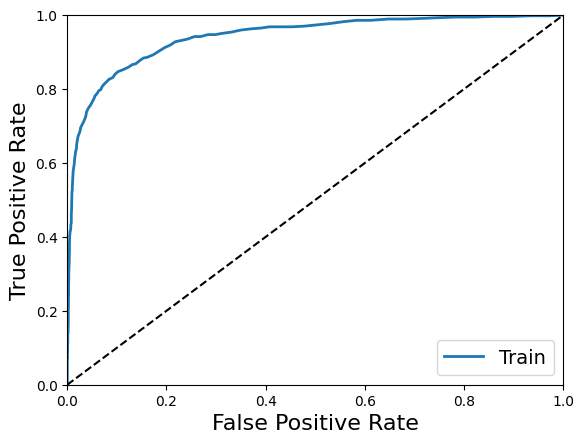

<Figure size 800x600 with 0 Axes>

ROC AUC Score: 0.802141225732775

Features Importance:
Top 5 top features:
mean_out_time : 0.13523792670684012
mean_duration : 0.1345999086786608
EnvironmentSatisfaction : 0.06214727967116479
YearsWithCurrManager : 0.06120215745195121
JobSatisfaction : 0.05487350413309994
Top 5 least features:
std_duration : 0.034741942819986424
std_in_time : 0.032760526012514585
PercentSalaryHike : 0.030993605186271322
YearsSinceLastPromotion : 0.03033799031306606
DistanceFromHome : 0.02945781831158346


In [17]:
dataWrangling = DataWrangling(
    dataframe_paths = 
    [
        "./data/general_data.csv", 
        "./data/employee_survey_data.csv", 
        "./data/manager_survey_data.csv"
    ], 
    on = "EmployeeID", 
    config_path = "./config_company.yml"
)
dataWrangling.main_pipeline()
dataWrangling.in_out_pipeline(in_time_path = "./data/in_time.csv", out_time_path = "./data/out_time.csv")
dataWrangling.prepared_data = dataWrangling.prepared_data.drop(columns = ["EmployeeID"])
dataTraining = DataTraining(dataWrangling.prepared_data)
dataTraining.split(test_size = 0.2, label = "Attrition_Yes", on = "Attrition_Yes")

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

dataTraining.tune(RandomForestClassifier(), param_distribs, 10) 
dataAnalysis = DataAnalysis(dataTraining)
dataAnalysis.confusion_matrix()
dataAnalysis.precision()
dataAnalysis.recall()
dataAnalysis.f1_score()
dataAnalysis.roc_curve()
dataAnalysis.roc_auc_score()
dataAnalysis.features_importance()

Sur la base des résultats obtenus, les facteurs ayant le plus d'influence sur le taux de turn-over chez HumanForYou en triant les données sont les suivants :

- mean_out_time (0.1352)
- mean_duration (0.1346)
- EnvironmentSatisfaction (0.0621)
- YearsWithCurrManager (0.0612)
- JobSatisfaction (0.0549)

On voit ici que l'on retrouve certains attributs en commun avec ceux trouvé precedemment ce qui nous conforte dans l'idée que les résultats sont fiables.

Sur la base de ces facteurs, voici quelques solutions que l'entreprise peut envisager pour réduire son taux de turn-over :

- Améliorer l'équilibre travail-vie personnelle : Mettre en place des horaires de travail flexibles, encourager le télétravail et permettre aux employés de mieux gérer leur temps de travail et leur vie personnelle.
- Offrir des opportunités de développement professionnel : Proposer des formations et des programmes de développement des compétences pour permettre aux employés de progresser dans leur carrière et se sentir valorisés.
- Créer un environnement de travail attrayant : Améliorer les conditions de travail en mettant en place un environnement sain et confortable, et en encourageant la communication et la collaboration entre les employés.
- Favoriser la fidélisation des employés : Mettre en place des programmes de rétention des employés, tels que des avantages sociaux, des opportunités de promotion interne et des programmes de reconnaissance des performances.
- Évaluer régulièrement la satisfaction des employés : Mettre en place des enquêtes et des entretiens réguliers pour recueillir les opinions des employés et comprendre leurs préoccupations, et agir en conséquence pour résoudre les problèmes identifiés.

En mettant en œuvre ces solutions, l'entreprise HumanForYou pourra travailler sur les facteurs clés identifiés et ainsi créer un environnement de travail plus attrayant et satisfaisant pour ses employés, ce qui devrait contribuer à réduire le taux de turn-over.

### Conclusion

En conclusion, l'analyse des données a permis d'identifier les principaux facteurs influençant le taux de turn-over chez HumanForYou. Les résultats obtenus sont cohérents avec les analyses précédentes, renforçant ainsi la fiabilité de ces conclusions. Pour remédier à cette situation, il est essentiel que l'entreprise mette en œuvre des stratégies visant à améliorer l'équilibre travail-vie personnelle, offrir des opportunités de développement professionnel, créer un environnement de travail attrayant, favoriser la fidélisation des employés et évaluer régulièrement leur satisfaction.

En mettant en pratique ces solutions, HumanForYou pourra aborder de manière proactive les causes du turn-over et ainsi créer un environnement de travail plus attrayant et satisfaisant pour ses employés. Cela devrait, à terme, contribuer à la réduction du taux de turn-over et permettre à l'entreprise d'améliorer sa réputation, de réduire les coûts liés au recrutement et à la formation, et d'optimiser la productivité et l'efficacité de ses employés.